In [52]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report

In [3]:
df=pd.read_csv("emails.csv")

In [4]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [10]:
df.shape

(5172, 3002)

In [11]:
X=df.drop(['Email No.','Prediction'],axis=1)

In [12]:
y=df['Prediction']

C:\Users\riyan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\riyan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\riyan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Prediction', ylabel='count'>

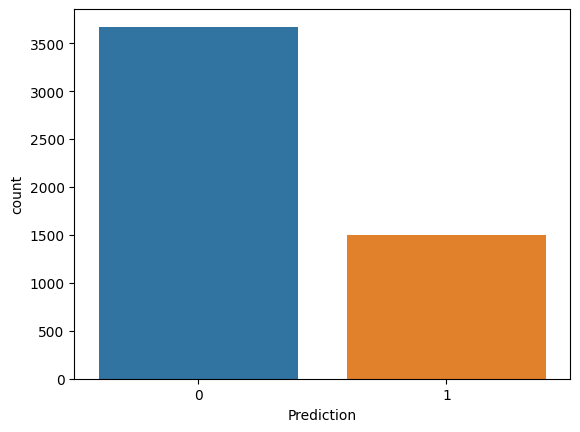

In [13]:
sns.countplot(x=y)

In [15]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [16]:
X_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [61]:
X_train.shape

(3620, 3000)

In [62]:
X_test.shape

(1552, 3000)

In [63]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [64]:
y_pred=knn.predict(X_test)

In [80]:
cr1=classification_report(y_test,y_pred)


In [81]:
print(cr1)

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1097
           1       0.68      0.93      0.79       455

    accuracy                           0.85      1552
   macro avg       0.83      0.88      0.84      1552
weighted avg       0.88      0.85      0.86      1552



In [73]:
KNN_acc=accuracy_score(y_test,y_pred)

linear', 'poly', 'rbf', 'sigmoid', 'precomputed

In [67]:
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [68]:
y_pred1=svm.predict(X_test)

In [71]:
svm1=accuracy_score(y_test,y_pred1)
svm1

0.967139175257732

In [77]:
cr2 = classification_report(y_test, y_pred1)

In [79]:
print(cr2)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1097
           1       0.93      0.96      0.95       455

    accuracy                           0.97      1552
   macro avg       0.96      0.97      0.96      1552
weighted avg       0.97      0.97      0.97      1552



In [74]:
pd.DataFrame({'Models':['KNN','SVC'],
             'ACC':[KNN_acc,svm1]})

,Models,ACC
0,KNN,0.854381
1,SVC,0.967139
